# PART I

## Exemple 01 

In [ ]:
# EXEMPLE 01 : 

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split 
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree

#Use the pandas function "read_csv" to read the csv file, using this Parameters :
   # - sep : to define the Delimiter to use  - header : None ( because there is no header in this csv file)
balance_data = pd.read_csv('/home/depinfo/TD_DataMining/balance-scale.data', sep= ',', header= None) 

balance_data.shape # see what this dataset contains, here there is 625 rows and 5 columns 

# divide data : here we separate the features that we use, from the target variable whitch is the first column 
X = balance_data.values[:, 1:5] # from the column 1 to 5 : feautures 
Y = balance_data.values[:,0] #the column one contains the target variable, that means the prediction output of our model 

# Split the data into train data and test data, the fisrt one is use to train the model, and the second for test
X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size = 0.3) # we choose 30 % of data for test and 70% for train  

# using the DecisionTreeClassifier function with this parameters to create our model 
        # criterion : use to measure the quality of split, here we use "entropy" for information gain, there is 2 types generally used: gini or entropy 
        # max_depth : max depth of the tree 
clf_entropy = DecisionTreeClassifier(criterion = "entropy", max_depth=3, min_samples_leaf=5)

# fit is used for training phase, here we train our model to be able to do predections 
clf_entropy.fit(X_train, y_train)
# predection phase :  we use fuction predict on our features test data to see the prediction output 
y_pred_en = clf_entropy.predict(X_test)
#Accuracy of the model * 100 to have the poucentage of accuracy 
print ("Accuracy is ", accuracy_score(y_test,y_pred_en)*100)

## Exemple 02 

In [11]:
# EXEMPLE 02 : 

import numpy as np
...
import graphviz
Jogging_data=pd.read_csv('/home/depinfo/TD_DataMining/JoggingTitre.csv', sep=',')
#Split data into y and x
y=Jogging_data['Jogging']
x=Jogging_data.drop(['Jogging'], axis=1)
#Convert categorical variable into dummies/indicator variables (For each variable we take all its possible values)
x_dum=pd.get_dummies(x)
x_dum

# partiel dummies : sub_dum=pd.get_dummies(x, columns=['Temps', 'Vent'])
clf_entropy = DecisionTreeClassifier(criterion = "entropy")
outputTree=clf_entropy.fit(x_dum, y)
#export our decision tree into a graphic format
dot_data = tree.export_graphviz(outputTree, out_file=None)
graph = graphviz.Source(dot_data)
#save it as td2_dum01 pdf file 
graph.render("Td2_dum01")

dot_data = tree.export_graphviz(outputTree, out_file=None, feature_names = x_dum.columns)
graph = graphviz.Source(dot_data)
graph.render("Td2_dum01Name")
#Check and compare the files Td2_dum01.pdf and Td2_dum01Name.pdf
"""
    The difference between the two file is : in the Td2_dum01Name.pdf we have the name of the features 
    because we added the parameter (feature_name) on the function tree.export_graphviz, that's why we 
    have explicit name 
    
"""

"\n    The difference between the two file is : in the Td2_dum01Name.pdf we have the name of the features \n    because we added the parameter (feature_name) on the function tree.export_graphviz, that's why we \n    have explicit name \n    \n"

In [15]:
# EXEMPLE 03 : 
import numpy as np
...
from sklearn.model_selection import KFold
balance_data = pd.read_csv('/home/depinfo/TD_DataMining/balance-scale.data', sep= ',', header= None)
#split data
X = balance_data.values[:, 1:5]
Y = balance_data.values[:,0]

# Provides train/test indices to split data in train/test sets it Split dataset into k consecutive folds 
kfold = KFold(10, True, 10)
#initialize accuracy and accuracy_score
ac=0.0
ac_score=0.0
# Compute accuracy for the 10 flods 
for train, test in kfold.split(X):
    X_train, X_test, y_train, y_test = X[train], X[test], Y[train], Y[test]
    clf_entropy.fit(X_train, y_train)
    y_pred_en = clf_entropy.predict(X_test)
    ac_score=accuracy_score(y_test,y_pred_en)*100
    ac=ac+ac_score
    print ("Accuracy is ", ac_score)
#compute the average accuracy 
ac_avg=ac/10
print ("Average Accuracy is ", ac_avg)


Accuracy is  74.60317460317461
Accuracy is  74.60317460317461
Accuracy is  79.36507936507937
Accuracy is  85.71428571428571
Accuracy is  77.77777777777779
Accuracy is  75.80645161290323
Accuracy is  82.25806451612904
Accuracy is  80.64516129032258
Accuracy is  72.58064516129032
Accuracy is  74.19354838709677
Average Accuracy is  77.7547363031234


## Exemple 05 

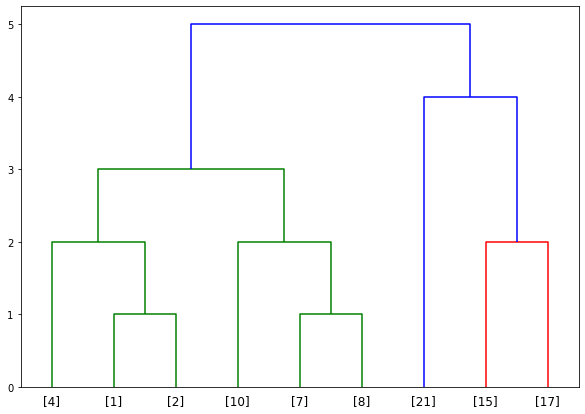

In [131]:
#EXEMPLE 05
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

#Define our dataset 
Y = np.array([[1], [2], [4], [7], [8], [10], [15],[17], [21]])
#choose the linkage method 
linked = linkage(Y, 'single')
#define the label list
labelList = [[1], [2], [4], [7], [8], [10], [15],[17], [21]]
#plot the dendrogram 
plt.figure(figsize=(10, 7))
dendrogram(linked,orientation='top',labels=labelList,distance_sort='descending',show_leaf_counts=True)
plt.show()

## Exemple 06 

In [194]:
#EXEMPLE 06 
import numpy as np
#Define the dataset Z 
Z = np.array([[11], [21], [22], [23], [26], [27], [28], [33],[35], [37], [47]])
#import Kmeans cluster for to do Kmeans clustering on the dataset 
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, init=np.array([[1], [2], [3]]))
kmeans.fit(Z)
kmeans.cluster_centers_
kmeans.labels_
from sklearn.cluster import AgglomerativeClustering
#Using for the same dataset another method of clustering whitch is Agglomerative Clustering whitch consist 
#On Recursively merges the pair of clusters that minimally increases a given linkage distance.
cluster = AgglomerativeClustering(n_clusters=3, linkage='single')
#fit the model 
cluster.fit(Z)
cluster.labels_

/home/depinfo/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  


array([2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1])

## Exemple 07 

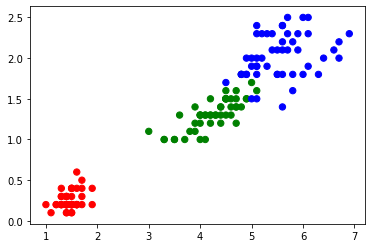

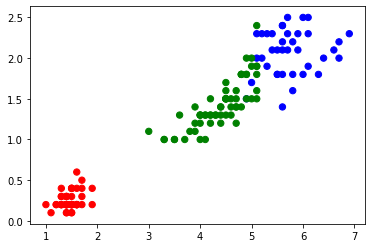

0.7302382722834697

In [203]:
import pandas as pd
import numpy as np
import sklearn.metrics as sm
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import datasets
from sklearn import metrics
#download the dataset 
iris = datasets.load_iris()
#Data visualisation 
print(iris)
print(iris.data)
print(iris.feature_names)
print(iris.target)
print(iris.target_names)

#Split data into train and test data 
x=pd.DataFrame(iris.data)
x.columns=['Sepal_Length','Sepal_width','Petal_Length','Petal_width']
y=pd.DataFrame(iris.target)
y.columns=['Targets']
#Define our Kmeans model 
model=KMeans(n_clusters=3)
model.fit(x)

colormap=np.array(['r','g','b'])
# parameters of scatter : s = scalar or array-like, c = color 
plt.scatter(x.Petal_Length, x.Petal_width,c=colormap[y.Targets],s=40)
plt.show()
plt.scatter(x.Petal_Length, x.Petal_width,c=colormap[model.labels_],s=40)
plt.show()
#The Rand Index computes a similarity measure between two clusterings by considering all pairs of samples and counting pairs that 
#are assigned in the same or different clusters in the predicted and true clusterings.
metrics.adjusted_rand_score(model.labels_, y.Targets)

# PART II

## EXERCICE 01

tic tac toe Dataset : Average Accuracy is  73.68567251461988  		 For max_Depth = 3
Car dataset : Average Accuracy is          76.16056941486663  		 For max_Depth = 3 

tic tac toe Dataset : Average Accuracy is  76.9298245614035  		 For max_Depth = 4
Car dataset : Average Accuracy is          81.20833333333334  		 For max_Depth = 4 

tic tac toe Dataset : Average Accuracy is  79.75219298245614  		 For max_Depth = 5
Car dataset : Average Accuracy is          79.74451754385964  		 For max_Depth = 5 

tic tac toe Dataset : Average Accuracy is  84.86622807017542  		 For max_Depth = 6
Car dataset : Average Accuracy is          80.26425438596493  		 For max_Depth = 6 

tic tac toe Dataset : Average Accuracy is  84.97039473684211  		 For max_Depth = 7
Car dataset : Average Accuracy is          80.78179824561404  		 For max_Depth = 7 

tic tac toe Dataset : Average Accuracy is  85.38486842105264  		 For max_Depth = 8
Car dataset : Average Accuracy is          79.84320175438596  		 For max_Depth

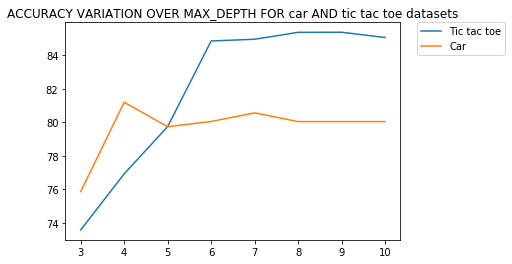

In [124]:

from sklearn.preprocessing import LabelEncoder 
import numpy as np
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree
import matplotlib.pyplot as plt
...
from sklearn.model_selection import KFold
import numpy as np
...
from sklearn.model_selection import KFold

tic_tac_data = pd.read_csv('/home/depinfo/TD_DataMining/tic-tac-toe.data', sep= ',', header= None)
#Encoding the dataset, with replacing categorical data with numerical data 
tic_tac_data = tic_tac_data.replace({'x', 'o', 'b'}, {int(1), int(2), int(3)})

#split data
X = tic_tac_data.values[:, 0:8]
Y = tic_tac_data.values[:,9]
#Encoding the last column : positive = 1 and negative = 0
labelencoder_Y = LabelEncoder()
Y = labelencoder_Y.fit_transform(Y)  

car = pd.read_csv('/home/depinfo/TD_DataMining/car.data', sep= ',', header= None)
car = car.replace({'low', 'med', 'high', 'vhigh','5more'}, {1,2,3,4,5})
car = car.replace({'small','more','big',}, {1,3,5})

Xc = car.values[:, 0:5]
Yc = car.values[:, 6]

X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size = 0.3)
Xc_train, Xc_test, yc_train, yc_test = train_test_split( Xc, Yc, test_size = 0.3)

Maxd = 3
kfold = KFold(10, True, 10)

for Maxd in range(3,11):
    ac_score = 0.0
    ac_score_car = 0.0
    ac = 0.0
    ac_car = 0.0
    for train, test in kfold.split(X):
        
        
        clf_entropy_tt = DecisionTreeClassifier(criterion ="entropy",   max_depth=Maxd,min_samples_leaf=5)
        clf_entropy_car = DecisionTreeClassifier(criterion ="entropy",   max_depth=Maxd,min_samples_leaf=5)

        clf_entropy_tt.fit(X_train, y_train)
        clf_entropy_car.fit(Xc_train, yc_train)
        
        y_pred_en = clf_entropy_tt.predict(X_test)
        yc_pred_en = clf_entropy_car.predict(Xc_test)
        
        ac_score=accuracy_score(y_test,y_pred_en)*100
        ac_score_car=accuracy_score(yc_test,yc_pred_en)*100
        
        #print ("Accuracy is  ",ac_score , "\t For max_Depth = ", Maxd)
        X_train, X_test, y_train, y_test = X[train], X[test], Y[train], Y[test]
        Xc_train, Xc_test, yc_train, yc_test = Xc[train], Xc[test], Yc[train], Yc[test]

        ac=ac+ac_score
        ac_car = ac_car + ac_score_car
       
        ac_avg=ac/10
        ac_avg_car = ac_car/10
        
    print ("tic tac toe Dataset : Average Accuracy is ", ac_avg, " \t\t For max_Depth =",Maxd )
    print ("Car dataset : Average Accuracy is         ", ac_avg_car, " \t\t For max_Depth =",Maxd,"\n")


plt.plot([3, 4, 5, 6, 7, 8, 9, 10], [73.58, 76.929, 79.752, 84.866,84.970, 85.383, 85.388, 85.0723],label="Tic tac toe")
plt.plot([3, 4, 5, 6, 7, 8, 9, 10], [75.871,81.208, 79.744,80.055,80.573,80.051, 80.051, 80.051], label="Car")
plt.title("ACCURACY VARIATION OVER MAX_DEPTH FOR car AND tic tac toe datasets")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

## Exercice 02

In [202]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree

tic_tac_data = pd.read_csv('/home/depinfo/TD_DataMining/tic-tac-toe.data', sep= ',', header= None)
#Encoding the dataset, with replacing categorical data with numerical data 
tic_tac_data = tic_tac_data.replace({'x', 'o', 'b'}, {int(1), int(2), int(3)})

#split data
X = tic_tac_data.values[:, 0:8]
Y = tic_tac_data.values[:,9]
#Encoding the last column : positive = 1 and negative = 0
labelencoder_Y = LabelEncoder()
Y = labelencoder_Y.fit_transform(Y)  

liste = [0.1,0.25,0.33,0.5,0.66,0.75,1]
for size in liste:
    X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size = size)
    clf_entropy = DecisionTreeClassifier(criterion = "entropy",  max_depth=3,min_samples_leaf=5)
    clf_entropy.fit(X_train, y_train)
    y_pred_en = clf_entropy.predict(X_test)
    print ("Accuracy for ", size*100,'%'," is   ", accuracy_score(y_test,y_pred_en)*100)

Accuracy for  10.0 %  is    72.91666666666666
Accuracy for  25.0 %  is    75.41666666666667
Accuracy for  33.0 %  is    71.29337539432177
Accuracy for  50.0 %  is    73.06889352818372
Accuracy for  66.0 %  is    70.45813586097947
Accuracy for  75.0 %  is    70.9318497913769
Accuracy for  100 %  is    100.0


## EXERCICE 03

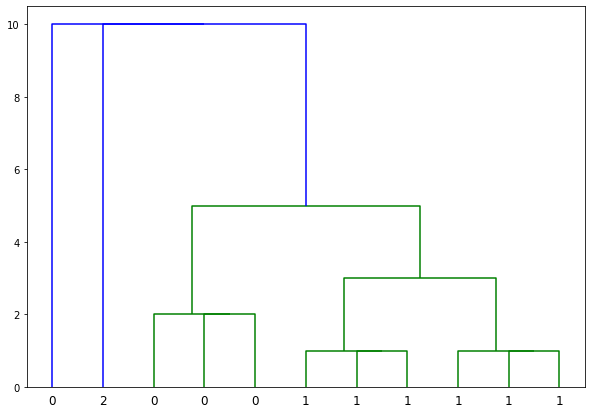

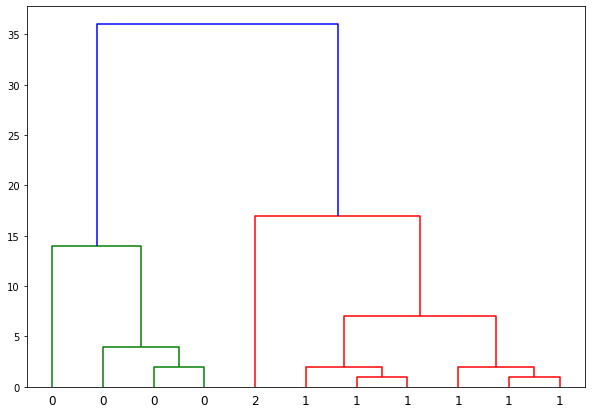

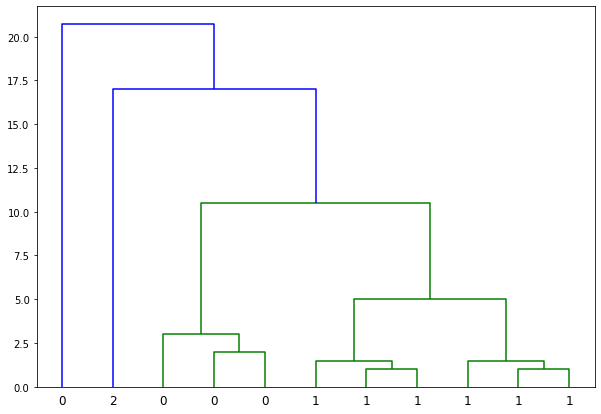

In [176]:
from sklearn.cluster import AgglomerativeClustering
import matplotlib
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

Z = np.array([[11], [21], [22], [23], [26], [27], [28], [33],[35], [37], [47]])

cluster = AgglomerativeClustering(n_clusters=3)
cluster.fit(Z)
cluster.labels_
################################# LINKAGE METHOD : Single #################################################
plt.figure(figsize=(10, 7))
linked = linkage(Z, 'single')
dendrogram(linked,orientation='top',labels=cluster.labels_,distance_sort='descending',show_leaf_counts=True)
plt.show()

################################# LINKAGE METHOD : complete #################################################
plt.figure(figsize=(10, 7))
linked = linkage(Z, 'complete')
dendrogram(linked,orientation='top',labels=cluster.labels_,distance_sort='descending',show_leaf_counts=True)
plt.show()

################################# LINKAGE METHOD : Average #################################################
plt.figure(figsize=(10, 7))
linked = linkage(Z, 'average')
dendrogram(linked,orientation='top',labels=cluster.labels_,distance_sort='descending',show_leaf_counts=True)
plt.show()




## Exercice 04 

## Exercice 05 

In [191]:
# USING AGGLOMERATIVE CLUSTERING 

from sklearn.cluster import AgglomerativeClustering
import matplotlib
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

x=pd.DataFrame(iris.data)
x.columns=['Sepal_Length','Sepal_width','Petal_Length','Petal_width']
y=pd.DataFrame(iris.target)
y.columns=['Targets']

print( '************** USING AGGLOMERATIVE CLUSTERING  ************** \n')
################################# LINKAGE METHOD : Single #################################################
model=AgglomerativeClustering(n_clusters=3, linkage='single')
model.fit(x)
print( 'performance with single linkage is ', metrics.adjusted_rand_score(model.labels_,y.Targets ))

################################# LINKAGE METHOD : Complete #################################################
model=AgglomerativeClustering(n_clusters=3, linkage='complete')
model.fit(x)
print( 'performance wth complete linkage is ', metrics.adjusted_rand_score(model.labels_,y.Targets ))

################################# LINKAGE METHOD : Average #################################################
model=AgglomerativeClustering(n_clusters=3, linkage='average')
model.fit(x)
print( 'performance with average linkage is ', metrics.adjusted_rand_score(model.labels_,y.Targets ))

################################# LINKAGE METHOD : Ward #################################################
model=AgglomerativeClustering(n_clusters=3, linkage='ward')
model.fit(x)
print( 'performance with ward linkage is ', metrics.adjusted_rand_score(model.labels_,y.Targets ),'\n')


#USING K MEANS  

import pandas as pd
import numpy as np
import sklearn.metrics as sm
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import datasets
from sklearn import metrics
iris = datasets.load_iris()
x=pd.DataFrame(iris.data)
x.columns=['Sepal_Length','Sepal_width','Petal_Length','Petal_width']
y=pd.DataFrame(iris.target)
y.columns=['Targets']
model=KMeans(n_clusters=3)
model.fit(x)


print( '************** USING K MEANS  ************** \n')
print('Performance with using K means is : ',metrics.adjusted_rand_score(model.labels_, y.Targets))



************** USING AGGLOMERATIVE CLUSTERING  ************** 

performance with single linkage is  0.5637510205230709
performance wth complete linkage is  0.64225125183629
performance with average linkage is  0.7591987071071522
performance with ward linkage is  0.7311985567707745 

************** USING K MEANS  ************** 

Performance with using K means is :  0.7302382722834697
